In [1]:
!nvidia-smi

Tue Jun 20 19:09:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.13    Driver Version: 525.60.13    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:B1:00.0 Off |                  N/A |
| 22%   24C    P8     6W / 250W |      1MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:B2:00.0 Off |                  N/A |
| 22%   

In [127]:
%pip install shapely

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 22.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.8 MB/s eta 0:00:00:00:0100:01


In [2]:
import os
os.environ['HTTP_PROXY'] = 'http://fp.cs.ovgu.de:3210/'
os.environ['HTTPS_PROXY'] = 'http://fp.cs.ovgu.de:3210/'

import torch
import numpy as np
import cv2

os.environ['CUDA_VISIBLE_DEVICES'] = "2,3"

ngpu = torch.cuda.device_count()
for gpu_id in range(ngpu):
    gpu = torch.cuda.get_device_name(gpu_id)
    print(f"GPU:{gpu_id} {gpu}")

GPU:0 NVIDIA GeForce RTX 2080 Ti
GPU:1 NVIDIA GeForce RTX 2080 Ti


In [3]:
torch.__version__

'1.13.1+cu117'

In [4]:
%pip install git+https://github.com/facebookresearch/segment-anything.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-jeaxzz0b
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-jeaxzz0b
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=c5a9e63afb019c8c86f385ea6970047a902b11fdd9c2e8cb38bdc6bd6bd3cf0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-264ofp8v/wheels/b0/7e/40/20f0b1e23280cc4a66dc8009c29f42cb4afc1b205bc5814786
Successfully built segment-anything
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install opencv-python pycocotools matplotlib onnxruntime onnx

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 20.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 63.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 45.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.6 MB/s eta 0:00:00
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp38-cp38-linux_x86_64.whl size=423874 sha256=2ddd54bd2160a305970d4934cf986acc8eb5c9a33f5d2863464fc23fc9f89ab4
  Stored in directory: /home/hashimi/.cache/pip/wheels/3e/08/ac/58126fe59992032701437336493f6132e1b723

In [5]:
os.getcwd()

'/home/hashimi'

In [4]:
os.chdir("/project/validating_attribution_techniques/")

In [11]:
os.getcwd()

'/project/validating_attribution_techniques'

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

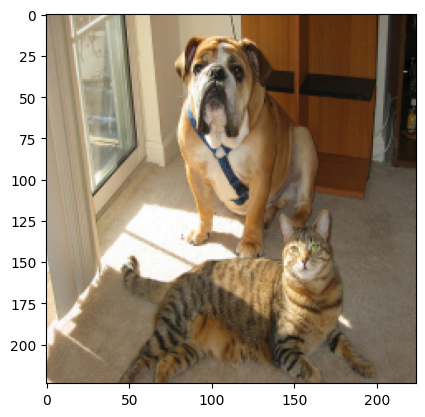

In [6]:
current_dir = os.getcwd()
img_rel_path = "commons/examples/input.png"
img_full_path = os.path.join(current_dir, img_rel_path)


image = Image.open(img_full_path)
plt.imshow(image)

In [7]:
from segment_anything import SamPredictor, sam_model_registry

In [8]:
# Source for the following functions: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [9]:
sam_model_full_path = os.path.join(current_dir, "abid/vendors/sam_vit_b_01ec64.pth")
sam = sam_model_registry["vit_b"](checkpoint=sam_model_full_path)
predictor = SamPredictor(sam)

In [10]:
predictor.set_image(np.array(image))

In [11]:
input_point = np.array([[150, 200]])
input_label = np.array([1])

masks, scores, logits = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=True)

In [12]:
masks.shape[-2:]

(224, 224)

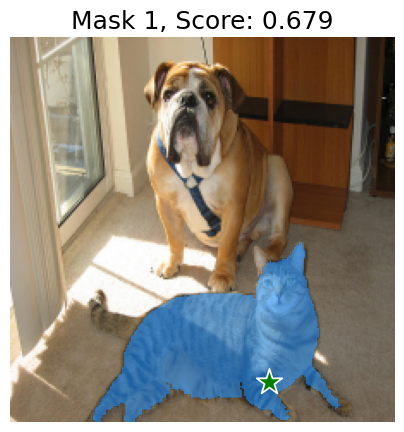

In [13]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()
    break

In [14]:
mask = masks[0]

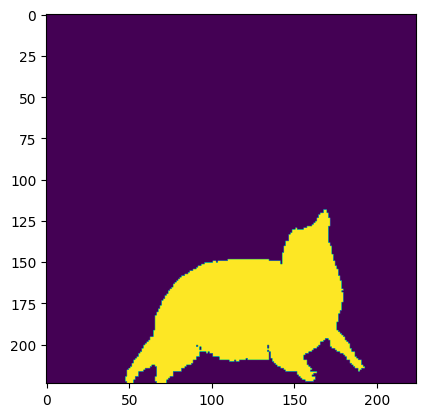

In [99]:
mask.shape
plt.imshow(mask)

In [17]:
def polygon_data_from_mask(img : np.array) -> np.array:
    pass


In [18]:
coords = np.argwhere(mask == True)

In [19]:
min_y, min_x = np.min(coords, axis=0)
max_y, max_x = np.max(coords, axis=0)

In [20]:
bounding_box = [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]

In [21]:
bounding_box

[(48, 119), (48, 223), (192, 223), (192, 119)]

In [22]:
np.max(coords, axis=0)

array([223, 192])

In [23]:
np.max(np.array([[12, 14], [2, 43]]), axis=0)

array([12, 43])

In [24]:
np.max(np.array([2, 3, 4]))

4

In [40]:
def border_coords(mask : np.array) -> np.array:
    border = np.zeros_like(mask, dtype=np.uint8)
    border[1:] = np.logical_xor(mask[:-1], mask[1:])
    border_coord = np.argwhere(border == 1)
    
    return border_coord, border

In [41]:
border_coord, mask_edges = border_coords(mask)

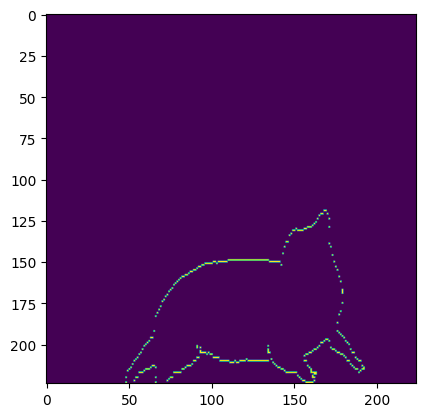

In [63]:
plt.imshow(mask_edges)

In [43]:
from shapely.geometry import Point, Polygon

In [55]:
point_objects = [Point(x, y) for y, x in border_coord]

In [56]:
polygon = Polygon([[p.x, p.y] for p in point_objects])

In [66]:
from skimage import measure

In [149]:
mask.shape

(224, 224)

In [232]:
contours = measure.find_contours(mask, 0.5, fully_connected='high')

In [233]:
longest_coutour = max(contours, key=len)

In [234]:
polygon = Polygon(longest_coutour)

In [391]:
def plot_polygon(polygon: Polygon, x_axis: int, y_axis: int):
    y, x = polygon.exterior.xy
    
    fig, ax = plt.subplots()
    ax.plot(x, y, color='red', alpha=0.5)
    ax.fill(x, y)
    plt.xlim(0, x_axis)
    plt.ylim(y_axis, 0)
    plt.show()

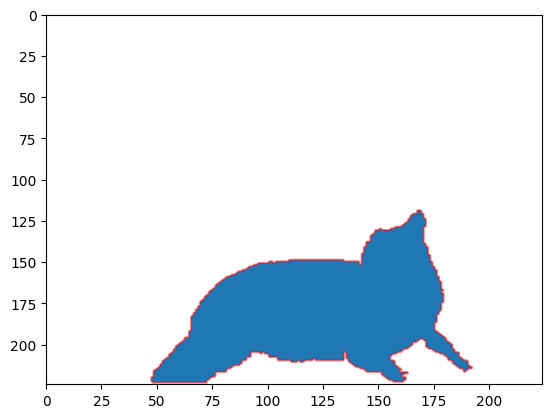

In [236]:
plot_polygon(polygon, 224, 224)

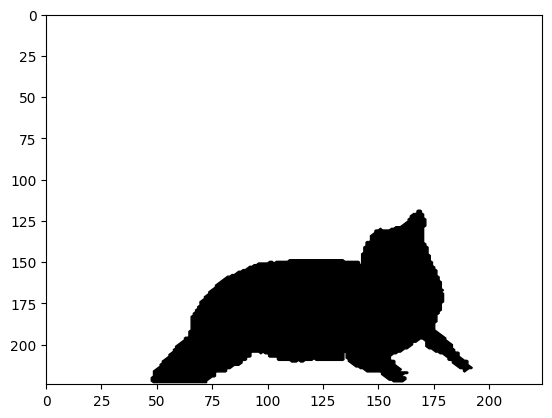

In [239]:
y, x = polygon.exterior.xy
    
fig, ax = plt.subplots()
# ax.plot(x, y, color='red', alpha=0.5)
ax.fill(x, y, color='black')
plt.xlim(0, 224)
plt.ylim(224, 0)

fig.canvas.draw()

# plt.show()

In [174]:
temp = longest_coutour[:, 0].copy()
longest_coutour[:, 0] = longest_coutour[:, 1]
longest_coutour[:, 1] = temp

In [208]:
np_poly_coord = np.array(polygon.exterior.coords)

In [209]:
np_poly_coord = np.round(np_poly_coord)

In [257]:
np_mask = np.zeros_like(mask)

In [258]:
np_mask.shape

(224, 224)

In [259]:
def filled_array_from_polygon(arr, polygon):
    height, width = arr.shape
    for y in range(height):
        for x in range(width):
            if polygon.contains(Point(y, x)):
                arr[y, x] = 1

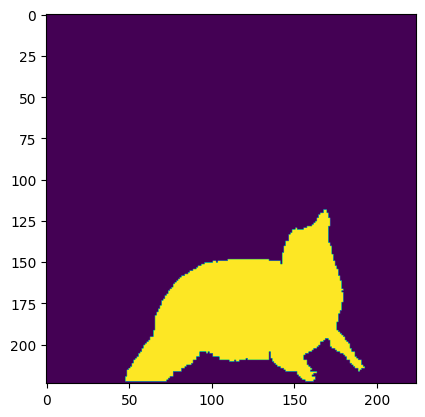

In [260]:
filled_array_from_polygon(np_mask, polygon)
plt.imshow(np_mask)

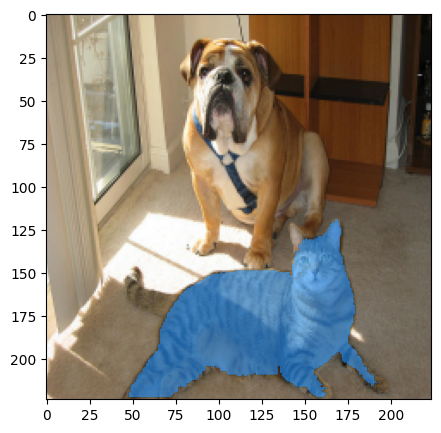

In [252]:
#polygon.contains(Point(49, 120))
plt.figure(figsize=(5,5))
plt.imshow(image)
show_mask(np_mask, plt.gca())
# show_points(input_point, input_label, plt.gca())
# plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
# plt.axis('off')
plt.show()

In [262]:
from shapely.affinity import scale

scalad_poly = scale(polygon, xfact=0.5, yfact=0.5)

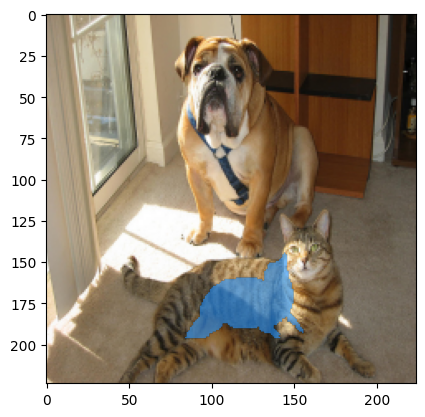

In [276]:
np_mask = np.zeros_like(mask)
filled_array_from_polygon(np_mask, scalad_poly)
plt.imshow(image)
show_mask(np_mask, plt.gca())
plt.show()

In [376]:
num_of_scaling_op = 7
saliency_value = 1/num_of_scaling_op

scale_val = 1;
np_mask = np.zeros_like(mask, dtype=float)

height, width = np_mask.shape
for _ in range(num_of_scaling_op):
    scaled_polygon = scale(polygon, xfact=scale_val, yfact=scale_val)
    for y in range(height):
        for x in range(width):
            if scaled_polygon.contains(Point(y, x)):
                np_mask[y, x] += saliency_value
    scale_val *= 0.8

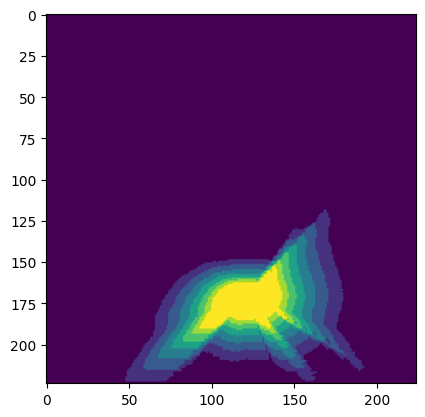

In [377]:
plt.imshow(np_mask)

In [373]:
def visualize_saliency_overlay(np_img, mask): # , probs, cat_idx, classes):
    
#     patch_size = 16
#     steps = int(224/patch_size)
#     for x in range(steps-1):
#     pos = (x+1)*patch_size
#     np_img[:, pos:pos+1, :] = 0
#     np_img[pos:pos+1, :, :] = 0

    # np_img = np.array(img)
    fig, ax = plt.subplots()
    heatmap = Image.fromarray(mask)
    heatmap = np.array(heatmap.resize((np_img.shape[0], np_img.shape[1])))
    ax.imshow(np_img)
    heatmap = (heatmap / np.max(heatmap)) * 255.0
    ax.imshow(heatmap, cmap='turbo', # seismic, hot, Reds
              alpha=0.5)
    # ax.set_title(f"Class: {classes[cat_idx]} ({probs[0, cat_idx].item()*100:.2f}%)")
    plt.show()
    
    return heatmap

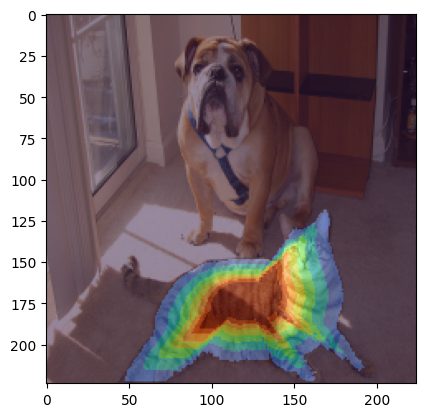

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [378]:
# color = np.array([30/255, 144/255, 255/255, 1])
# mask_image = np_mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
visualize_saliency_overlay(np.array(image), np_mask)
# plt.imshow(mask_image)
# plt.show()

In [317]:
from scipy.signal import convolve2d

In [319]:
np_mask.shape

(224, 224)

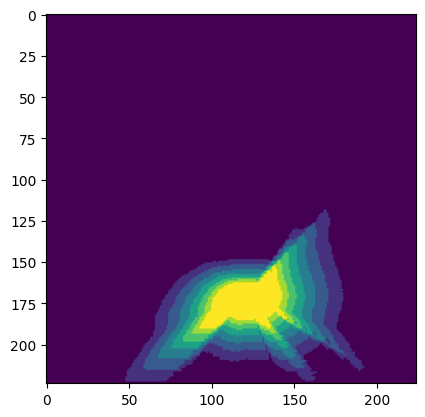

In [379]:
plt.imshow(np_mask)

In [384]:
kernel = np.array([
    [ 45,  78, 128,  78, 45],
    [ 78, 128, 170, 128, 78],
    [128, 170, 255, 170, 128],
    [ 78, 128, 170, 128, 78],
    [ 45,  78, 128,  78, 45],
])

In [385]:
kernel = kernel/kernel.sum()
kernel.sum()

1.0

In [389]:
np_mask = convolve2d(np_mask, kernel, mode='full')

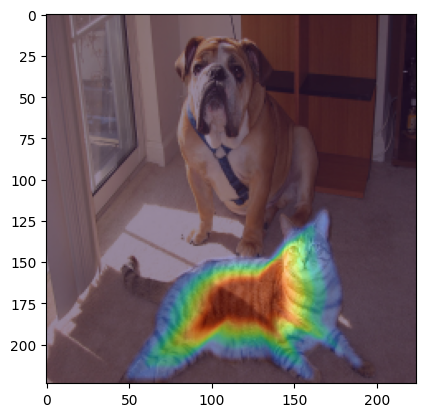

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [390]:
visualize_saliency_overlay(np.array(image), np_mask)

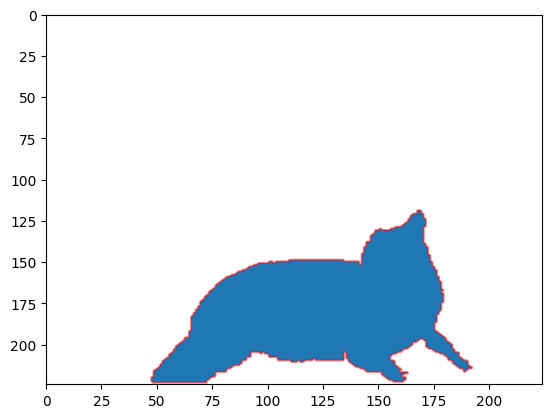

In [393]:
plot_polygon(polygon, 224, 224)

In [398]:
# from shapely.ops import decimate
from shapely import simplify

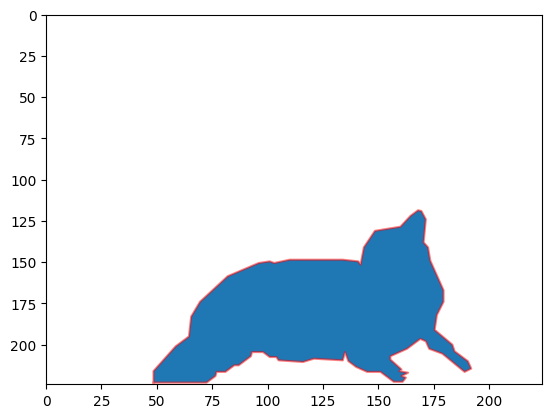

In [411]:
decimated_poly = simplify(polygon, 1, preserve_topology=False)
plot_polygon(decimated_poly, 224, 224)

In [423]:
num_of_scaling_op = 7
saliency_value = 1/num_of_scaling_op

scale_val = 1;
np_mask = np.zeros_like(mask, dtype=float)

decimation_tolerance = 1
decimated_poly = simplify(polygon, decimation_tolerance, preserve_topology=False)

height, width = np_mask.shape
for _ in range(num_of_scaling_op):
    decimated_poly = simplify(decimated_poly, decimation_tolerance, preserve_topology=False)
    scaled_polygon = scale(decimated_poly, xfact=scale_val, yfact=scale_val)
    for y in range(height):
        for x in range(width):
            if scaled_polygon.contains(Point(y, x)):
                np_mask[y, x] += saliency_value
    scale_val *= 0.8
    decimation_tolerance *= 1.7

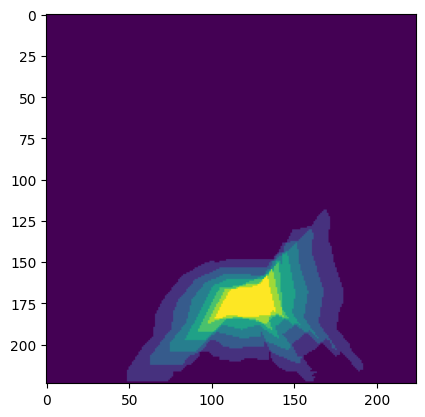

In [424]:
plt.imshow(np_mask)

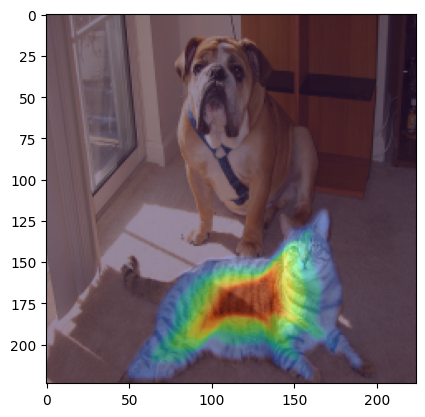

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [425]:
np_mask = convolve2d(np_mask, kernel, mode='full')

visualize_saliency_overlay(np.array(image), np_mask)